In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
# Reading in json file
df = pd.read_json('/Users/butler/Documents/hp/ultimate_challenge/logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Adding instance column to df with 1 in each row
df['instances'] = 1

In [6]:
df.head()

,login_time,instances
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [7]:
# Setting the index to the login_time which is a datatime62 type
df.set_index('login_time', inplace=True)

In [8]:
df.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

In [9]:
df.head()

,instances
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   instances  93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [11]:
# Resampling every 15 minutes to get the number of instances within every 15 minute interval
df15 = df.resample('15min').sum()

In [12]:
df15.head()

,instances
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [13]:
df15.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')

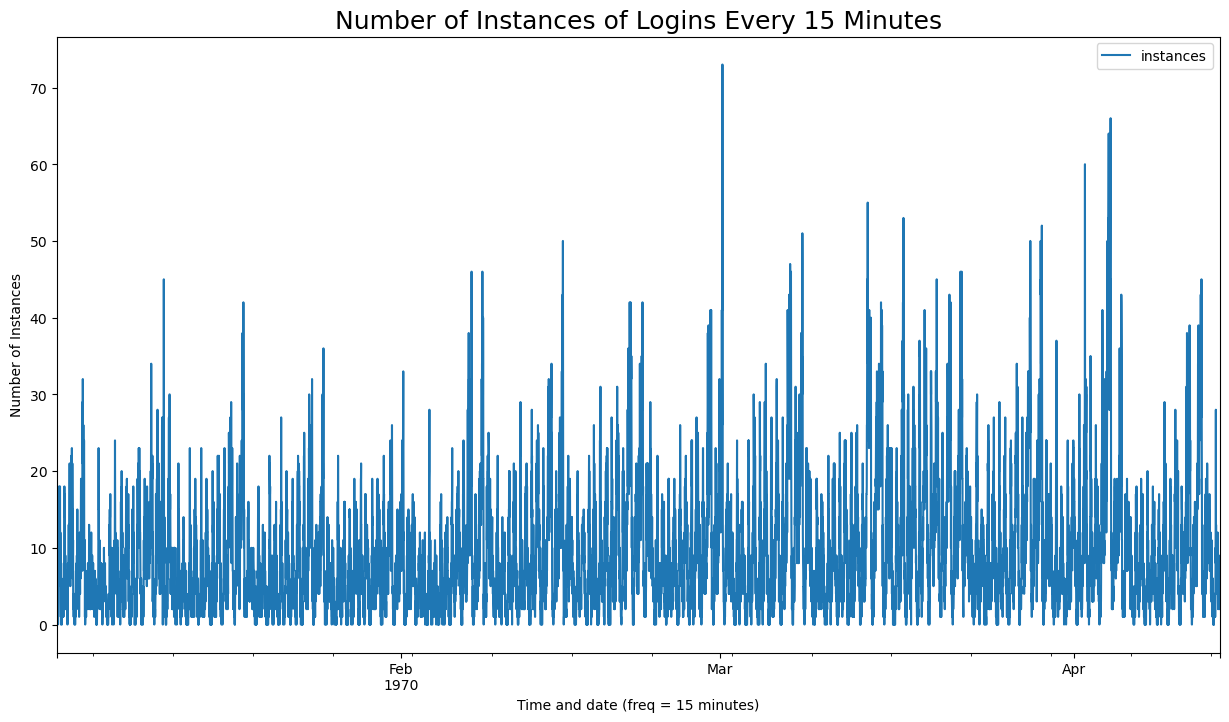

In [14]:
df15.plot(figsize=(15,8))
_ = plt.title('Number of Instances of Logins Every 15 Minutes', fontsize=18)
_ = plt.xlabel('Time and date (freq = 15 minutes)')
_ = plt.ylabel('Number of Instances')

In [15]:
# Getting data for January only
df15j = df15.loc['1970-1-1':'1970-1-31']

In [16]:
df15j.head()

,instances
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


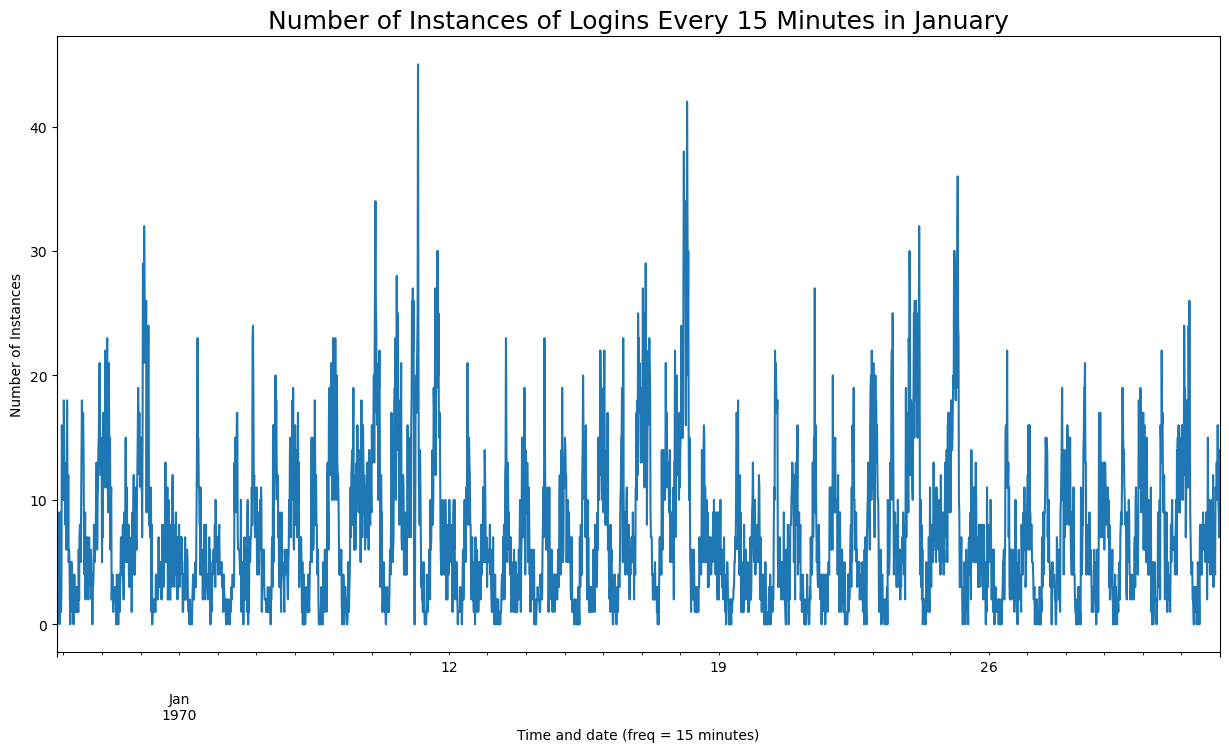

In [17]:
_ = df15j.instances.plot(figsize=(15,8))
_ = plt.title('Number of Instances of Logins Every 15 Minutes in January', fontsize=18)
_ = plt.xlabel('Time and date (freq = 15 minutes)')
_ = plt.ylabel('Number of Instances')

In [18]:
# Getting data for the first 12 days of January. Since there is no increasing or decreasing trend in the plot
# entitled Number of Instances of Logins Every 15 Minutes, an additive model is being used.
df15j = df15.loc['1970-1-1':'1970-1-12']

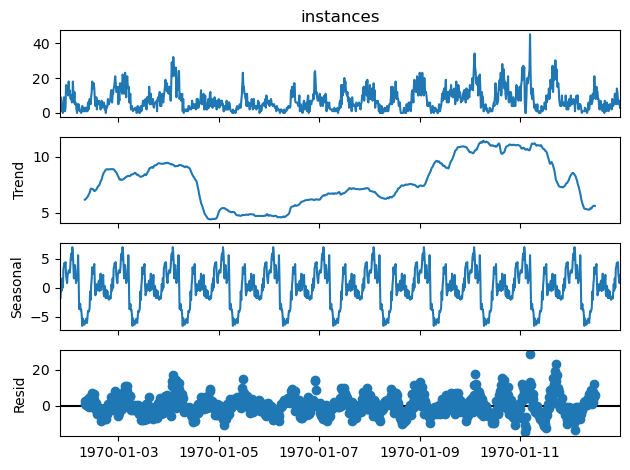

In [19]:
# Decomposing times series. Since there is no increasing or decreasing trend in the plot entitled 
#'Number of Instances of Logins Every 15 Minutes', an additive model is being used.
y = df15j.instances
period = 4 * 24
decompositionj = sm.tsa.seasonal_decompose(y, period=period, model='additive')
_ = decompositionj.plot()


In [20]:
# Getting data for the first 12 days of February
df15f = df15.loc['1970-2-1':'1970-2-12']

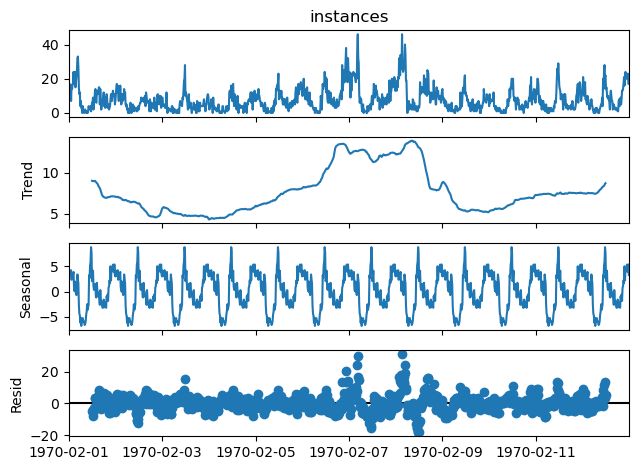

In [22]:
# Decomposing times series
y = df15f.instances
period = 4 * 24
decompositionf = sm.tsa.seasonal_decompose(y, period=period)
_ = decompositionf.plot()

In [23]:
# Getting data for the first 12 days of March
df15m = df15.loc['1970-3-1':'1970-3-12']

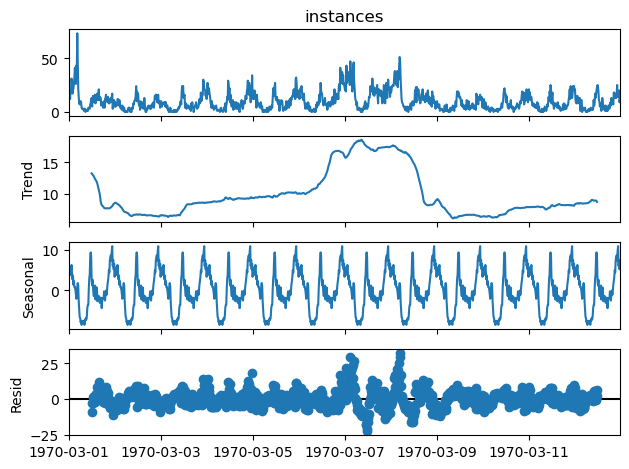

In [25]:
# Decomposing times series
y = df15m.instances
period = 4 * 24
decompositionm = sm.tsa.seasonal_decompose(y, period=period)
_ = decompositionm.plot()

In [26]:
# Getting data for the first 12 days of April
df15a = df15.loc['1970-4-1':'1970-4-12']

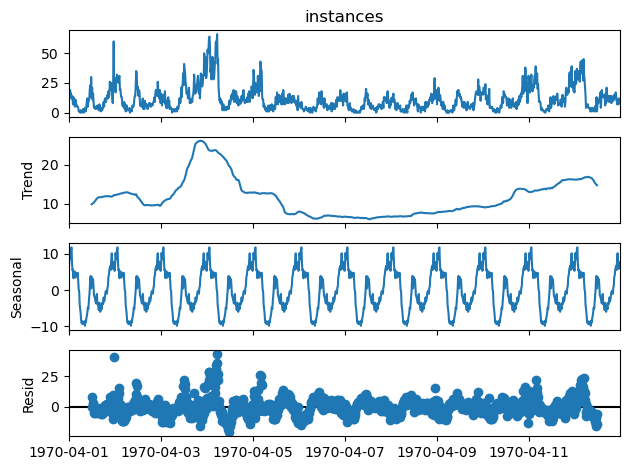

In [27]:
# Decomposing times series
y = df15a.instances
period = 4 * 24
decompositiona = sm.tsa.seasonal_decompose(y, period=period)
_ = decompositiona.plot()

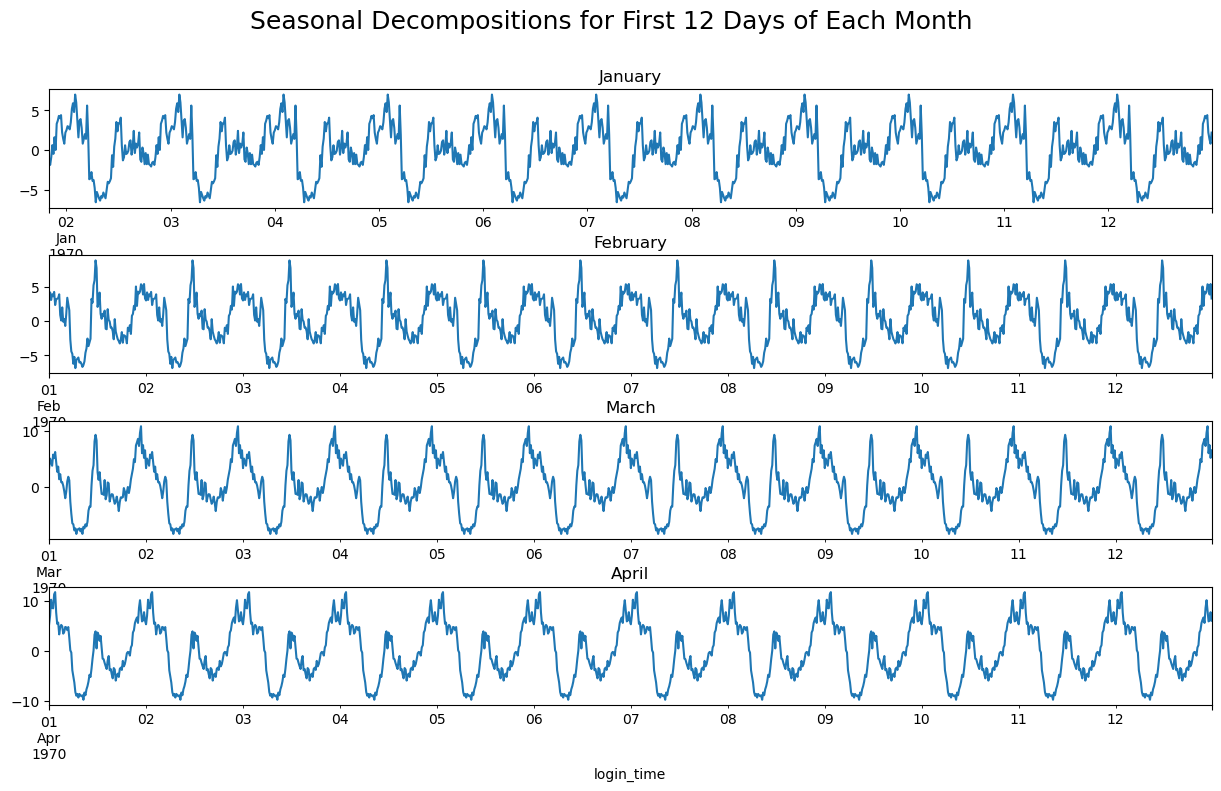

In [28]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8), sharex='row')
fig.subplots_adjust(hspace=.4)
_ = decompositionj.seasonal.plot(ax=ax1)
_ = decompositionf.seasonal.plot(ax=ax2)
_ = decompositionm.seasonal.plot(ax=ax3)
_ = decompositiona.seasonal.plot(ax=ax4)


ax1.title.set_text('January')
ax2.title.set_text('February')
ax3.title.set_text('March')
ax4.title.set_text('April')
_ = fig.suptitle('Seasonal Decompositions for First 12 Days of Each Month', fontsize=18)

## When comparing the first 12 days of each month, the daily changes are similar for February, March, and April, but not identical. January is somewhat different from the other months.

In [29]:
# Getting data for all the data for each month
df15ja = df15.loc['1970-1-1':'1970-1-31']
df15fa = df15.loc['1970-2-1':'1970-2-28']
df15ma = df15.loc['1970-3-1':'1970-3-31']
df15aa = df15.loc['1970-4-1':'1970-4-13']

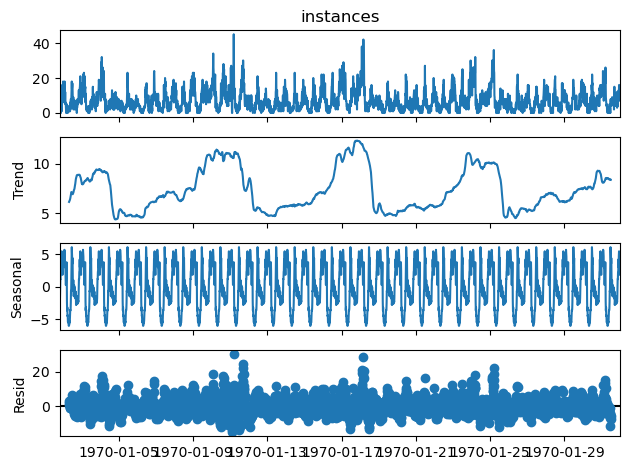

In [30]:
# Decomposing times series
y = df15ja.instances
decompositionja = sm.tsa.seasonal_decompose(y, period=period)
_ = decompositionja.plot()

In [31]:
# Decomposing times series
y = df15fa.instances
decompositionfa = sm.tsa.seasonal_decompose(y, period=period)

In [32]:
# Decomposing times series
y = df15ma.instances
decompositionma = sm.tsa.seasonal_decompose(y, period=period)

In [33]:
# Decomposing times series
y = df15aa.instances
decompositionaa = sm.tsa.seasonal_decompose(y, period=period)

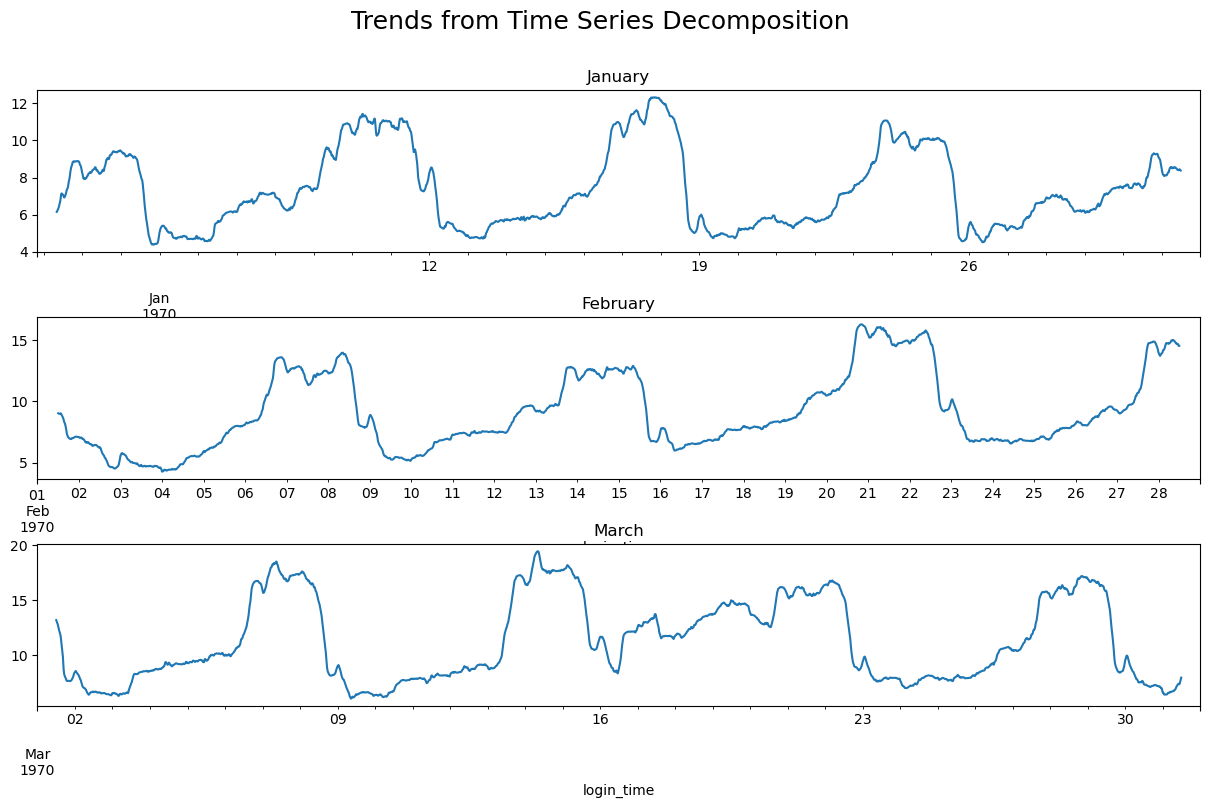

In [34]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8), sharex='row')
fig.subplots_adjust(hspace=.4)
_ = decompositionja.trend.plot(ax=ax1)
_ = decompositionfa.trend.plot(ax=ax2)
_ = decompositionma.trend.plot(ax=ax3)


ax1.title.set_text('January')
ax2.title.set_text('February')
ax3.title.set_text('March')


_ = fig.suptitle('Trends from Time Series Decomposition', fontsize=18)

## For February and March, the trends are very similar while the low points in February and March are the high points in January. April was not plotted because it only has 13 days of data.

In [35]:
# Decomposing entire times series
y = df15.instances
decomposition = sm.tsa.seasonal_decompose(y, period=period)

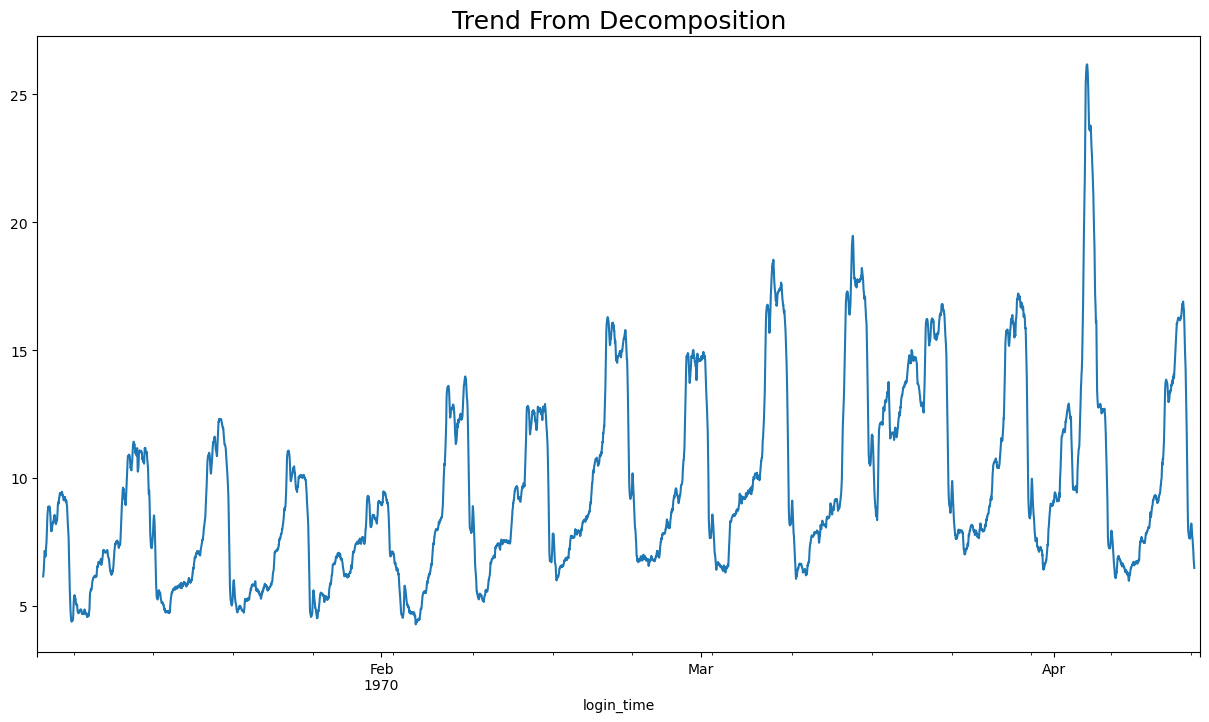

In [36]:
figsize=(15,8)
decomposition.trend.plot(figsize=(15,8))
_ = plt.title('Trend From Decomposition', fontsize=18)

## The decomposition trend shows that usage is largest in March with the beginning of April being close to the end of February. January has the lowest usage. In the first week of April, there is a surge in usage. I do not know whether this is an error in the data or whether an event occurred for which more transportation was needed.

In [37]:
# Getting data for January 6-7th
df15j1 = df15.loc['1970-1-6':'1970-1-7']

# Decomposing times series
y = df15j1.instances
period = 4 * 24
decompositionj1 = sm.tsa.seasonal_decompose(y, period=period)

In [38]:
# Getting data for February 6-7th
df15f1 = df15.loc['1970-2-6':'1970-2-7']

# Decomposing times series
y = df15f1.instances
period = 4 * 24
decompositionf1 = sm.tsa.seasonal_decompose(y, period=period)

In [39]:
# Getting data for March 6-7th
df15m1 = df15.loc['1970-3-6':'1970-3-7']

# Decomposing times series
y = df15m1.instances
period = 4 * 24
decompositionm1 = sm.tsa.seasonal_decompose(y, period=period)

In [40]:
# Getting data for April 6-7th
df15a1 = df15.loc['1970-4-6':'1970-4-7']

# Decomposing times series
y = df15a1.instances
period = 4 * 24
decompositiona1 = sm.tsa.seasonal_decompose(y, period=period)


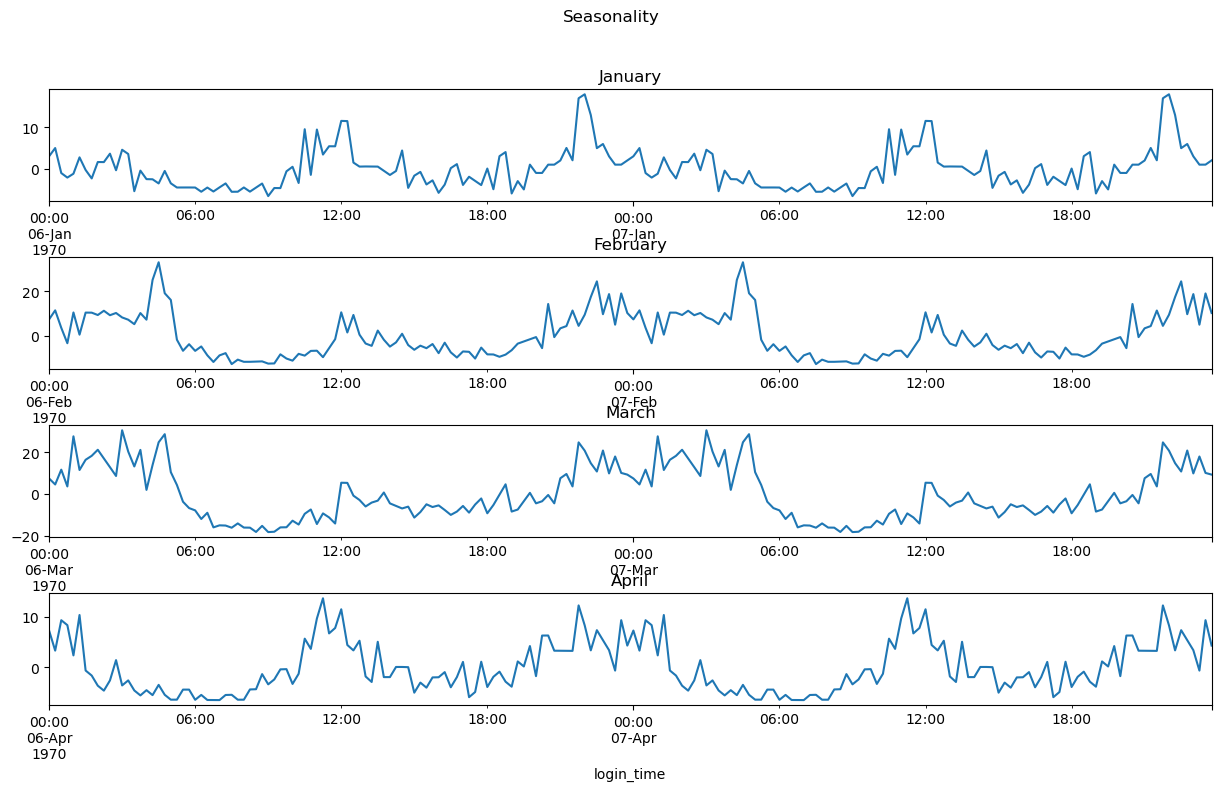

In [41]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
fig.subplots_adjust(hspace=.5)
_ = decompositionj1.seasonal.plot(ax=ax1)
_ = decompositionf1.seasonal.plot(ax=ax2)
_ = decompositionm1.seasonal.plot(ax=ax3)
_ = decompositiona1.seasonal.plot(ax=ax4)
ax1.title.set_text('January')
ax2.title.set_text('February')
ax3.title.set_text('March')
ax4.title.set_text('April')
_ = fig.suptitle('Seasonality')


## February and March have very similar daily trends: The time of highest usage is from about 10pm to early morning, with the peak usage at about 5am. Around noon there is also an increase.

## In January, the peak usage is at about 10pm, with a range of high usage around 10am-noon.

## April's peak usage is about 11am, with high usage from 10am-1pm and 7pm-2am.

